In [1]:
%matplotlib inline 
%load_ext autoreload
%autoreload 2
%config InlineBackend.figure_format = 'retina' # I use a HiDPI screen

In [2]:
import emcee
import sys
from astropy.table import Table
from astropy.io import ascii
import numpy as np
import matplotlib.pyplot as plt
import corner
from mpl_toolkits.mplot3d import Axes3D

default_color_list = plt.rcParams['axes.prop_cycle'].by_key()['color'] # get default colors

In [8]:
from astropy.io import ascii
data = ascii.read("megabarfile.csv", delimiter=",")  
print(data)
print(data.colnames)

                     observable                        mnu+    ...     As+    
--------------------------------------------------- ---------- ... -----------
                     5z PS ($\ell_{max} \sim 5000$) 0.48419633 ...  2.79525928
                       5z PS $\ell_{max} \sim 2000$ 0.52041988 ...  2.85941377
5z PS $\ell_{max} \sim 5000$  ($\mathbf{fiducial}$) 0.48419633 ...  2.79525928
                       5z PS $\ell_{max} \sim 8000$ 0.45664599 ...  2.73115763
                       1z PS $\ell_{max} \sim 5000$ 0.55333823 ...  3.01899376
                                  5z Peaks 1 arcmin 0.34131446 ...  2.31611941
            5z Peaks 2 arcmin ($\mathbf{fiducial}$) 0.32298518 ...  2.34096046
                                  5z Peaks 5 arcmin 0.35548687 ...   2.4626099
                                  1z Peaks 2 arcmin 0.53969428 ...  2.52382504
                              5z Low Peaks 2 arcmin 0.45414796 ...  2.45394005
                           5z Medium Peaks 2 arcmin 

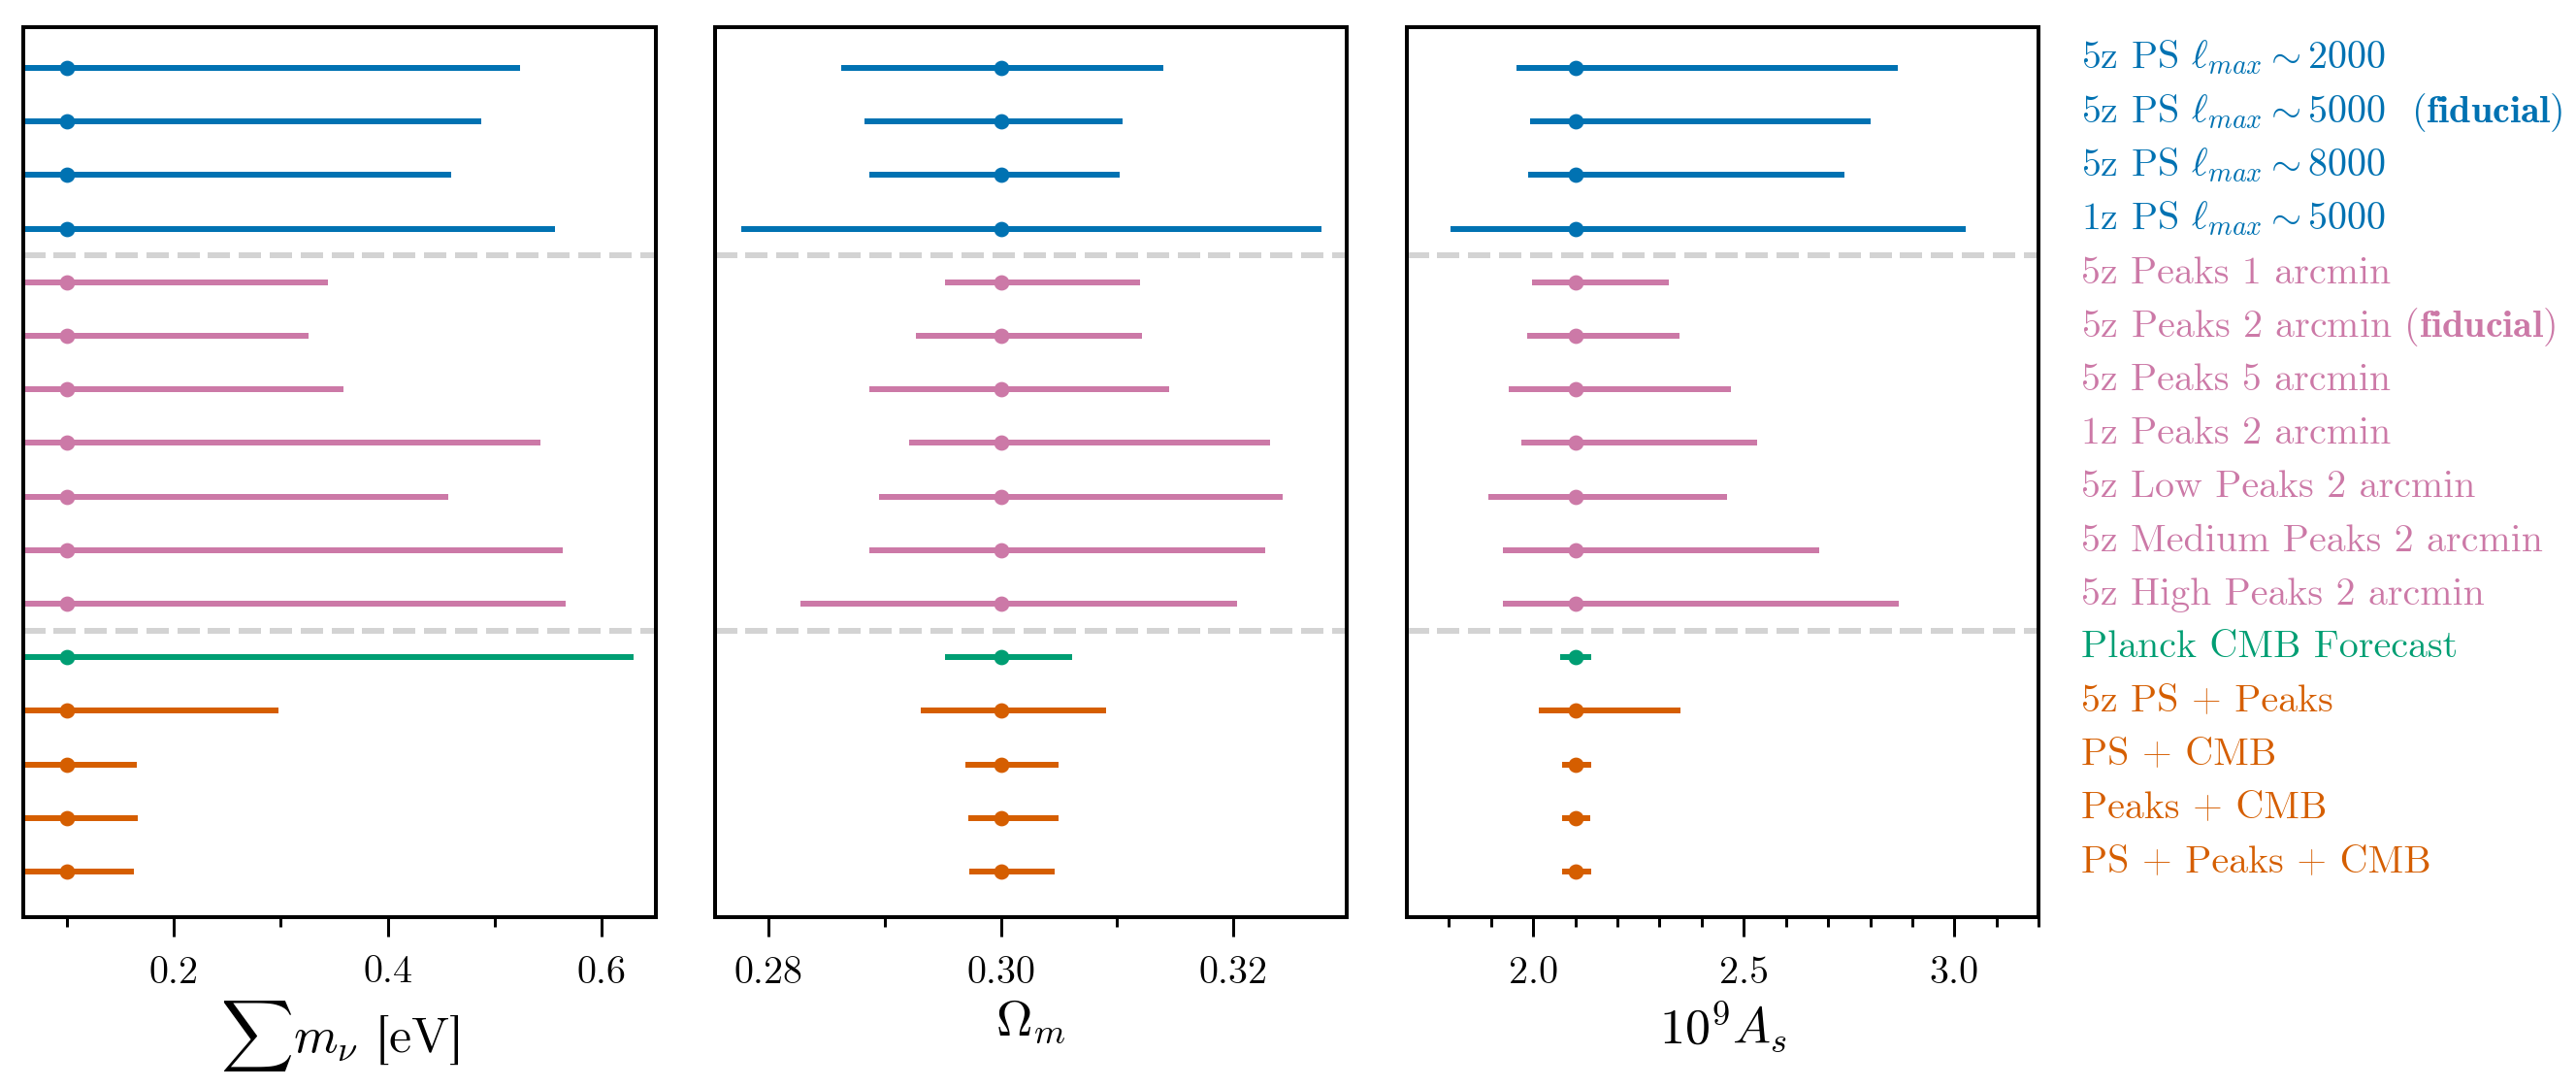

In [9]:
fig, ax = plt.subplots(1,3,figsize=(15,8), sharey=True)

for i in range(1,len(data)):
    col = default_color_list[2]
    if "Peaks" in data["observable"][i]:
        col = default_color_list[0]
    if  "PS" in data["observable"][i]:
        col = default_color_list[1]
    if " Peaks" in data["observable"][i]:
        col = default_color_list[4]
    if  "+" in data["observable"][i]:
        col = default_color_list[3]
        
    ax[0].plot( [0, data["mnu+"][i]], [16-i, 16-i], color=col )
    ax[0].scatter( [0.1], [16-i], color=col, s=24 )
    ax[1].plot( [data["om-"][i], data["om+"][i]], [16-i, 16-i], color=col )
    ax[1].scatter( [0.3], [16-i], color=col, s=24 )
    ax[2].plot( [data["As-"][i], data["As+"][i]], [16-i, 16-i], color=col )
    ax[2].scatter( [2.1], [16-i], color=col, s=24 )
    ax[2].text( 3.3, 16-i, data["observable"][i], fontsize=20, color=col )
    
    for ax_ in ax:
        ax_.axhline(4.5, ls="dashed", color="#d3d3d3")
        ax_.axhline(11.5, ls="dashed", color="#d3d3d3")


ax[0].set_xlabel(r"$\sum m_{\nu}$ [eV]")
ax[1].set_xlabel(r"$\Omega_m$")
ax[2].set_xlabel(r"$10^9 A_s$")
ax[0].set_xlim(0.06,0.65)
ax[2].set_xlim(1.7,3.2)

for i in range(3):
    ax[i].tick_params(axis='y', which='both', left=False, labelleft=False)

ax[0].set_xticks([0.1,0.3,0.5], minor=True)
ax[1].set_xticks([0.29, 0.31], minor=True)
ax[2].set_xticks([1.8,1.9, 2.1, 2.2, 2.3, 2.4, 2.6,2.7,2.8,2.9,3.1,3.2], minor=True)
plt.tight_layout()

plt.savefig("figures/MEGABARPLOT.pdf")

## 

In [128]:
data["om"] = data["om+"] - data["om-"]
data["As"] = data["As+"] - data["As-"]
ascii.write(data, sys.stdout, Writer = ascii.Latex,
            latexdict = {'tabletype': 'table*'},formats={'mnu+': '%.3f', 
                                                         'om-': '%.3f', 'om+': '%.3f',
                                                         'As-': '%.3f', 'As+': '%.3f',
                                                        'om': '%.3f', 'As': '%.3f'})

\begin{table*}
\begin{tabular}{cccccccc}
observable & mnu+ & om- & om+ & As- & As+ & om & As \\
5z PS ($\ell_{max} \sim 5000$) & 0.484 & 0.289 & 0.310 & 1.999 & 2.795 & 0.022 & 0.796 \\
PS $\ell_{max} \sim 2000$ & 0.520 & 0.286 & 0.314 & 1.968 & 2.859 & 0.027 & 0.892 \\
PS $\ell_{max} \sim 5000$ & 0.484 & 0.289 & 0.310 & 1.999 & 2.795 & 0.022 & 0.796 \\
PS $\ell_{max} \sim 8000$ & 0.457 & 0.289 & 0.310 & 1.996 & 2.731 & 0.021 & 0.736 \\
PS 1z & 0.553 & 0.278 & 0.327 & 1.810 & 3.019 & 0.049 & 1.209 \\
Peaks 5z 1 arcmin & 0.341 & 0.295 & 0.312 & 2.004 & 2.316 & 0.016 & 0.312 \\
Peaks 5z 2 arcmin & 0.323 & 0.293 & 0.312 & 1.993 & 2.341 & 0.019 & 0.348 \\
Peaks 5z 5 arcmin & 0.355 & 0.289 & 0.314 & 1.949 & 2.463 & 0.025 & 0.513 \\
Peaks 1z & 0.540 & 0.292 & 0.323 & 1.979 & 2.524 & 0.031 & 0.545 \\
Low Peaks & 0.454 & 0.290 & 0.324 & 1.901 & 2.454 & 0.034 & 0.553 \\
Medium Peaks & 0.561 & 0.289 & 0.322 & 1.936 & 2.672 & 0.034 & 0.736 \\
High Peaks & 0.564 & 0.283 & 0.320 & 1.934 & 2.860 & 0